In [29]:
import torchvision
from torchvision.transforms import ToTensor
import torch

In [30]:
train_ds = torchvision.datasets.MNIST('data',
                                      train=True,
                                      transform=ToTensor(),
                                      download=True)

In [31]:
test_ds = torchvision.datasets.MNIST('data',
                                      train=False,
                                      transform=ToTensor(),
                                      download=True)

In [32]:
train_dl = torch.utils.data.DataLoader(train_ds, 
                                       batch_size=64,
                                       shuffle=True)

In [33]:
test_dl = torch.utils.data.DataLoader(test_ds, 
                                       batch_size=64)

In [34]:
imgs, labels = next(iter(train_dl))

In [35]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [36]:
import matplotlib.pyplot as plt
import numpy as np

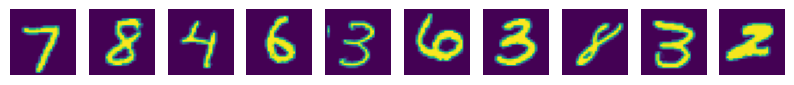

In [37]:
plt.figure(figsize=(10, 1))
for i, img in enumerate(imgs[:10]):
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.subplot(1, 10, i+1)
    plt.imshow(npimg)
    plt.axis('off')

In [38]:
labels[:10]

tensor([7, 8, 4, 6, 3, 6, 3, 8, 3, 2])

# 激活函数

In [39]:
# relu激活： f(x) = max(x, 0)

In [40]:
input = torch.randn(5)

In [41]:
input

tensor([ 1.1296,  0.3222, -0.0503,  0.2570, -0.4360])

In [42]:
torch.relu(input)

tensor([1.1296, 0.3222, 0.0000, 0.2570, 0.0000])

In [43]:
torch.sigmoid(input)

tensor([0.7558, 0.5799, 0.4874, 0.5639, 0.3927])

In [44]:
torch.tanh(input)

tensor([ 0.8109,  0.3115, -0.0503,  0.2515, -0.4103])

In [45]:
from torch import nn

In [46]:
nn.LeakyReLU(input)

LeakyReLU(negative_slope=tensor([ 1.1296,  0.3222, -0.0503,  0.2570, -0.4360]))

In [47]:
#创建多层感知器模型

In [48]:
from torch import nn

In [49]:
# nn.Linear() # 全连接层 要求输入的数据是一维   （batch, features）

In [50]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(28*28, 120)
        self.linear_2 = nn.Linear(120, 84)
        self.linear_3 = nn.Linear(84, 10)
    def forward(self, input):
        x = input.view(-1, 1*28*28)
        x = torch.relu(self.linear_1(x))
        x = torch.relu(self.linear_2(x))
        logits = self.linear_3(x)
        return logits    # 未激活的输出，叫做logits

In [51]:
#模型输出是C个可能值上概率， C表示类别总数  np.argmax（[0.1， 0.2， 0.8]）

#  logits                                 【5， 10， 40】

# 如何解析模型预测结果
import numpy as np

np.argmax([0.9, 0.04, 0.06])  

# torch.argamx

In [52]:
# 两个概率分布的计算： [0.9, 0.04, 0.06]     [0, 0, 1]

In [53]:
# 定义损失函数
loss_fn = torch.nn.CrossEntropyLoss()

#损失函数的输入：

loss_fn ： target ： 0，1，2、、、、  并不是独热编码的形式

           input： logits

In [54]:
# 优化： 根据计算得到的损失，调整模型参数，降低损失的过程  Adam、SGD

In [55]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Model().to(device)   # 初始化模型

In [56]:
opt = torch.optim.SGD(model.parameters(), lr=0.001)

# 编写训练循环

In [57]:
# 训练函数
def train(dl, model, loss_fn, optimizer):
    size = len(dl.dataset)    
    num_batches = len(dl)
        
    train_loss, correct = 0, 0
        
    for x, y in dl:
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            train_loss += loss.item()
    correct /= size
    train_loss /= num_batches
    return correct, train_loss

In [58]:
# 测试函数
def test(test_dl, model, loss_fn):
    size = len(test_dl.dataset)    
    num_batches = len(test_dl)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for x, y in test_dl:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            test_loss += loss.item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        correct /= size
        test_loss /= num_batches
        return correct, test_loss

In [59]:
# 训练50 个epoch， 每一个epoch代表将全部数据集训练一遍

In [60]:
epochs = 50
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_acc, epoch_loss = train(train_dl, model, loss_fn, opt)
    epoch_test_acc, epoch_test_loss = test(test_dl, model, loss_fn)
    train_acc.append(epoch_acc)
    train_loss.append(epoch_loss)
    test_acc.append(epoch_test_acc)
    test_loss.append(epoch_test_loss)
    
    template = ("epoch:{:2d}, train_Loss:{:.5f}, train_acc:{:.1f},test_Loss:{:.5f}, test_acc:{:.1f}")
    
    print(template.format(epoch, epoch_loss, epoch_acc*100, epoch_test_loss, epoch_test_acc*100))
print('Done')

epoch: 0, train_Loss:2.29353, train_acc:10.1,test_Loss:2.27951, test_acc:10.7
epoch: 1, train_Loss:2.26539, train_acc:18.4,test_Loss:2.24446, test_acc:27.5
epoch: 2, train_Loss:2.22110, train_acc:32.4,test_Loss:2.18513, test_acc:38.0
epoch: 3, train_Loss:2.14438, train_acc:43.1,test_Loss:2.08303, test_acc:49.9
epoch: 4, train_Loss:2.01342, train_acc:54.7,test_Loss:1.91174, test_acc:59.0
epoch: 5, train_Loss:1.80449, train_acc:63.3,test_Loss:1.65572, test_acc:67.1
epoch: 6, train_Loss:1.52444, train_acc:69.8,test_Loss:1.35428, test_acc:72.4
epoch: 7, train_Loss:1.23814, train_acc:74.0,test_Loss:1.08939, test_acc:76.6
epoch: 8, train_Loss:1.00962, train_acc:77.7,test_Loss:0.89728, test_acc:79.4
epoch: 9, train_Loss:0.84931, train_acc:80.3,test_Loss:0.76617, test_acc:81.5
epoch:10, train_Loss:0.73936, train_acc:82.0,test_Loss:0.67568, test_acc:82.9
epoch:11, train_Loss:0.66264, train_acc:83.3,test_Loss:0.61164, test_acc:83.8
epoch:12, train_Loss:0.60675, train_acc:84.3,test_Loss:0.56371, 

In [61]:
import matplotlib.pyplot as plt

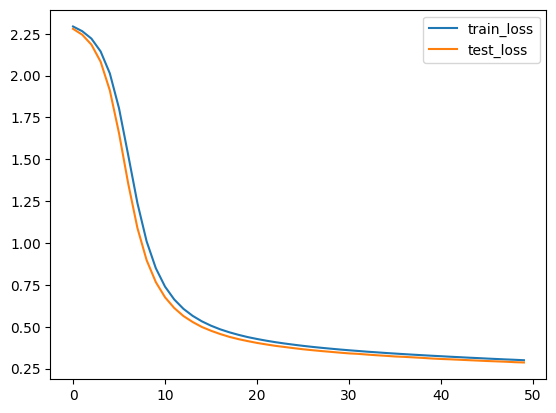

In [62]:
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), test_loss, label='test_loss')
plt.legend()

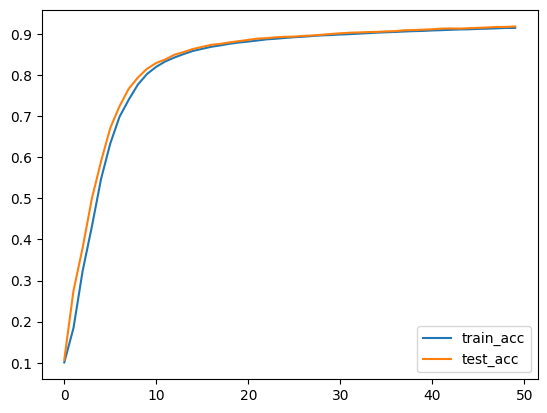

In [63]:
plt.plot(range(epochs), train_acc, label='train_acc')
plt.plot(range(epochs), test_acc, label='test_acc')
plt.legend()